<a href="https://www.kaggle.com/code/eavprog/abscur-pred-one-one?scriptVersionId=149446687" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Прогнозирование абсолютного курса одной валюты с использованием всех имеющихся

# Загрузка библиотек

In [1]:
!pip install fedot==0.6.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.9/493.9 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 4.1 MB/s eta 0:00:00
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15079 sha256=6b7b9421122d5a4f572338d284a9f5046790b55430e1633f64015fdc8f8a050e
  Stored in directory: /root

In [2]:
# Plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

import warnings
warnings.filterwarnings('ignore')

# Prerocessing for FEDOT
from fedot.core.data.data import InputData
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams

from fedot.core.data.data_split import train_test_data_setup
from fedot.core.data.multi_modal import MultiModalData

# FEDOT 
from fedot.core.pipelines.pipeline import Pipeline
from fedot.api.main import Fedot

import logging
logging.raiseExceptions = False

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

import time
import pickle

# Импорт данных

In [4]:
abscur_data = pd.read_csv('/kaggle/input/abscur-data/abscur.csv',index_col='Date')
abscur_data

,AUD,HKD,JPY,SEK,USD,CAD,CHF,EUR,CNY,CZK,...,PKR,PLN,QAR,RON,SAR,THB,TRY,TWD,UAH,VND
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-24,12.159123,1.818943,0.119266,1.897159,14.116446,12.508005,14.600489,17.559034,2.298456,0.637020,...,0.139147,4.185131,3.876547,3.966074,3.762880,0.430117,6.332517,0.455737,0.937316,0.000663
2014-11-25,12.044274,1.819092,0.119666,1.901584,14.118616,12.536687,14.638259,17.611218,2.300944,0.638980,...,0.138826,4.219929,3.877143,3.979317,3.763559,0.430446,6.363177,0.456440,0.940802,0.000661
2014-11-26,12.045147,1.818022,0.119895,1.907480,14.106437,12.535026,14.672645,17.641778,2.297993,0.640031,...,0.138706,4.223105,3.874862,3.999897,3.759411,0.430862,6.384158,0.456593,0.942125,0.000660
2014-11-27,12.057459,1.823927,0.119974,1.903085,14.143677,12.473238,14.664537,17.627140,2.303418,0.638720,...,0.139073,4.218970,3.885092,3.987279,3.769335,0.431604,6.411458,0.457798,0.944612,0.000662
2014-11-28,12.071798,1.828934,0.119480,1.908166,14.198605,12.428579,14.706606,17.675403,2.311027,0.640488,...,0.139819,4.241555,3.899966,3.997355,3.783470,0.432489,6.396344,0.458315,0.948534,0.000667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-31,13.841431,2.786765,0.144116,1.957706,21.831496,15.742543,24.039145,23.087372,2.982847,0.941125,...,0.077609,5.194265,5.997664,4.650045,5.822509,0.604918,0.771829,0.673666,0.596978,0.000896
2023-11-01,13.963441,2.786706,0.144543,1.954037,21.801539,15.751715,24.058630,23.074436,2.982307,0.935547,...,0.077379,5.162571,5.989434,4.639119,5.811574,0.603252,0.770141,0.672742,0.596159,0.000895
2023-11-02,13.976347,2.776042,0.144387,1.954017,21.719394,15.801605,24.010710,23.069321,2.969415,0.944167,...,0.076752,5.190439,5.966866,4.645462,5.792765,0.604660,0.766836,0.670207,0.593913,0.000892


# Загрузка истории

In [5]:
history = []

# Цикл


======================================== AED ========================================
2023-11-05 18:13:36,701 - Unknown integration target: 
2023-11-05 18:13:44,102 - Unknown integration target: 
2023-11-05 18:13:51,935 - Unknown integration target: 
2023-11-05 18:13:59,266 - Unknown integration target: 
2023-11-05 18:14:06,657 - Unknown integration target: 
2023-11-05 18:14:23,113 - Unknown integration target: 
2023-11-05 18:14:39,371 - Unknown integration target: 
2023-11-05 18:14:55,908 - Unknown integration target: 
2023-11-05 18:14:58,020 - Unknown integration target: 
2023-11-05 18:14:58,024 - Unknown integration target: 
2023-11-05 18:15:05,112 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 261.7 MiB, max: 263.3 MiB
2023-11-05 18:15:05,118 - ApiComposer - Initial pipeline was fitted in 4.8 sec.
2023-11-05 18:15:05,122 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023

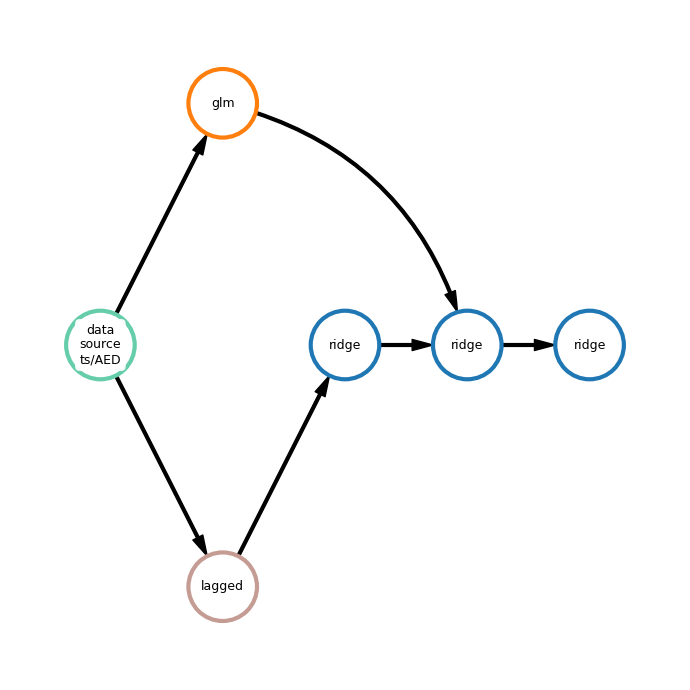

[5.01128807 5.01104591 5.01082784 5.01060776 5.01040311 5.01018733
 5.00999724 5.00980309 5.00958905 5.00936086]
{'mae': 0.021, 'mape': 0.004}


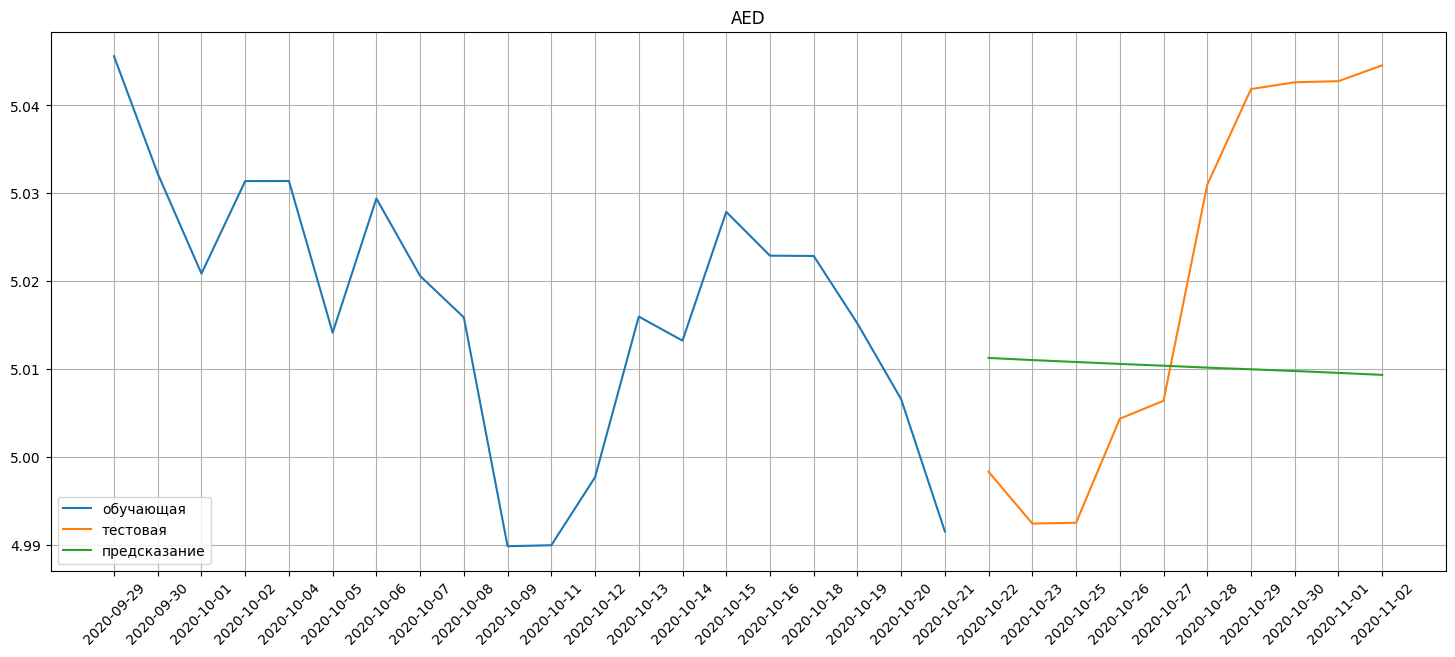


======================================== ZAR ========================================
2023-11-05 18:16:30,142 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.1 MiB
2023-11-05 18:16:30,150 - ApiComposer - Initial pipeline was fitted in 9.2 sec.
2023-11-05 18:16:30,159 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-05 18:16:30,187 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 1 min. Set of candidate models: ['smoothing', 'diff_filter', 'gaussian_filter', 'glm', 'ts_naive_average', 'polyfit', 'cut', 'sparse_lagged', 'locf', 'lagged', 'ets', 'ar', 'sgdr', 'glm', 'ts_naive_average', 'cut', 'lasso', 'ransac_lin_reg', 'dtreg', 'rfr', 'ridge', 'normalization', 'ransac_non_lin_reg', 'smoothing', 'diff_filter', 'gaussian_filter', 'polyfit', 'linear', 'sparse_lagged', 'scaling', 'locf', 'adareg', 'lagged', 'pca', 'ets', 'ar'].
2023-11-05 

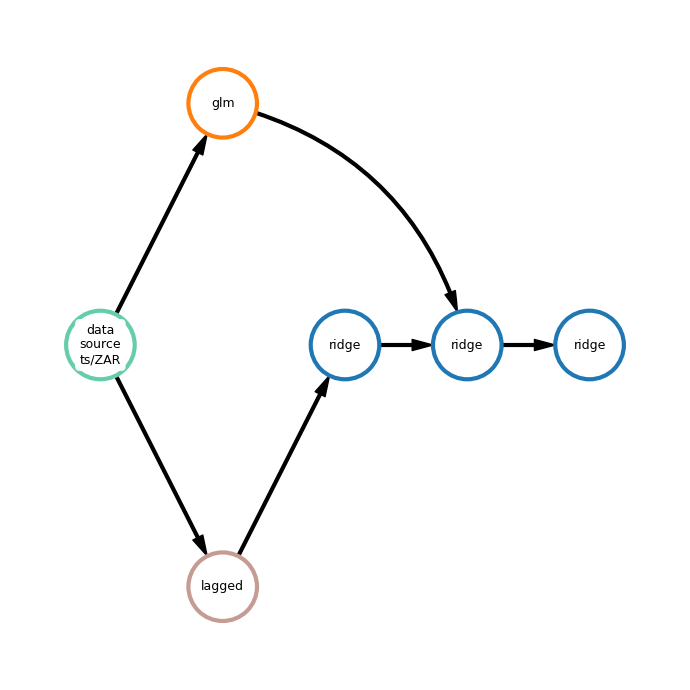

[1.18280601 1.18291649 1.18303494 1.18315701 1.18327651 1.18339146
 1.18350595 1.18361541 1.18372318 1.18382902]
{'mae': 0.013, 'mape': 0.011}


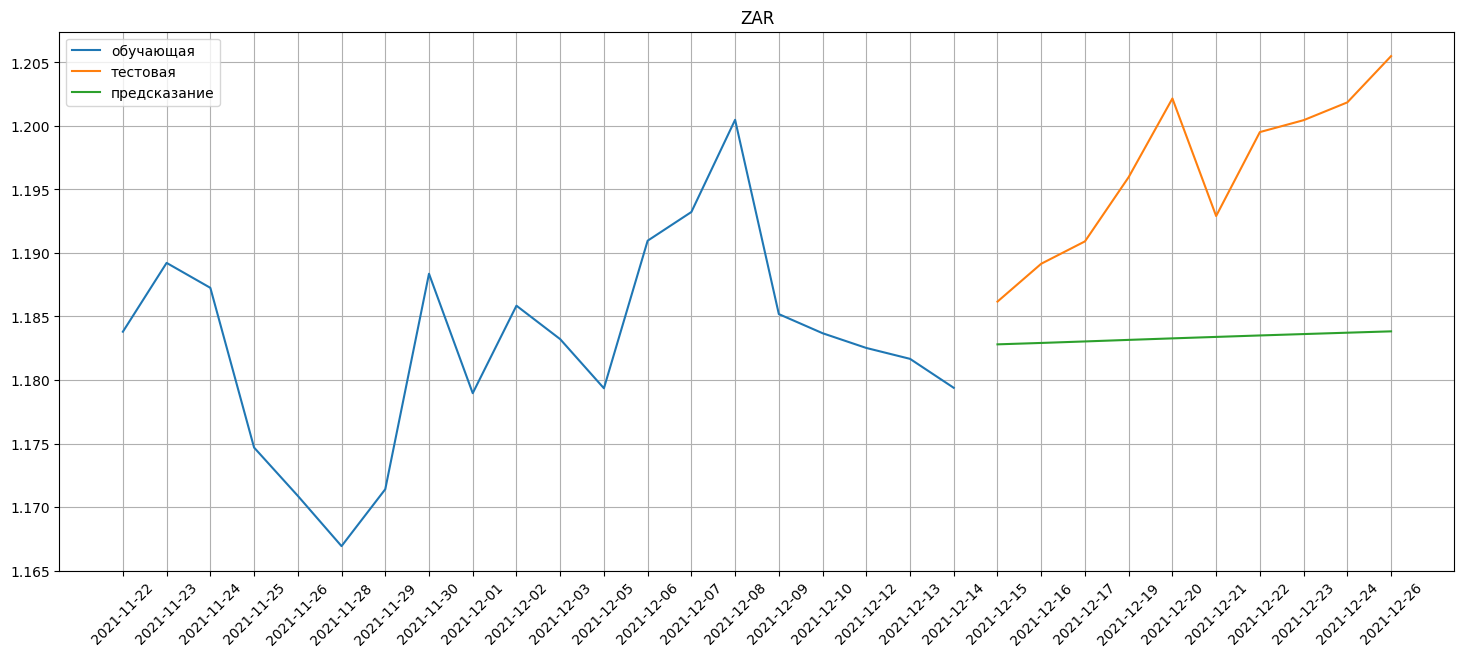


======================================== MYR ========================================
2023-11-05 18:18:05,904 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.5 MiB
2023-11-05 18:18:05,913 - ApiComposer - Initial pipeline was fitted in 12.9 sec.
2023-11-05 18:18:05,921 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-05 18:18:05,944 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 1 min. Set of candidate models: ['smoothing', 'diff_filter', 'gaussian_filter', 'glm', 'ts_naive_average', 'polyfit', 'cut', 'sparse_lagged', 'locf', 'lagged', 'ets', 'ar', 'sgdr', 'glm', 'ts_naive_average', 'cut', 'lasso', 'ransac_lin_reg', 'dtreg', 'rfr', 'ridge', 'normalization', 'ransac_non_lin_reg', 'smoothing', 'diff_filter', 'gaussian_filter', 'polyfit', 'linear', 'sparse_lagged', 'scaling', 'locf', 'adareg', 'lagged', 'pca', 'ets', 'ar'].
2023-11-05

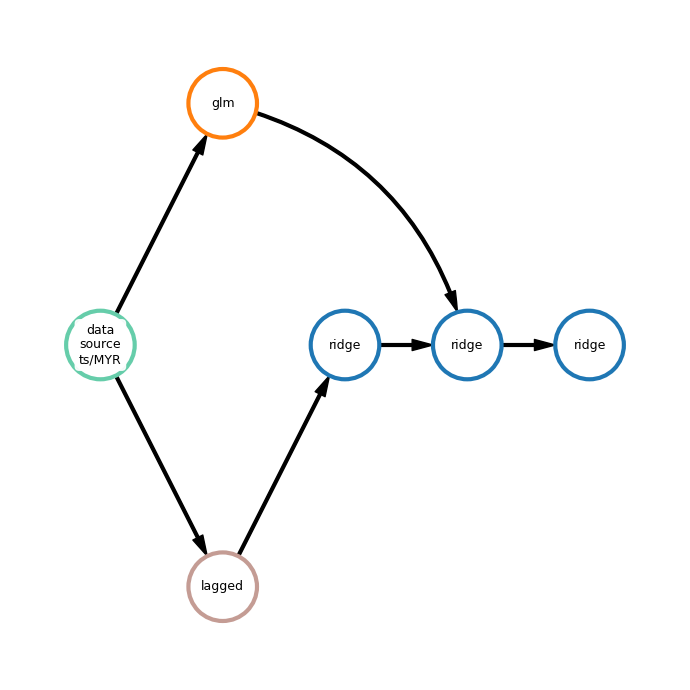

[4.7418586  4.74219906 4.74238988 4.7426034  4.74272815 4.7428402
 4.74296252 4.74302149 4.74310884 4.74313481]
{'mae': 0.048, 'mape': 0.01}


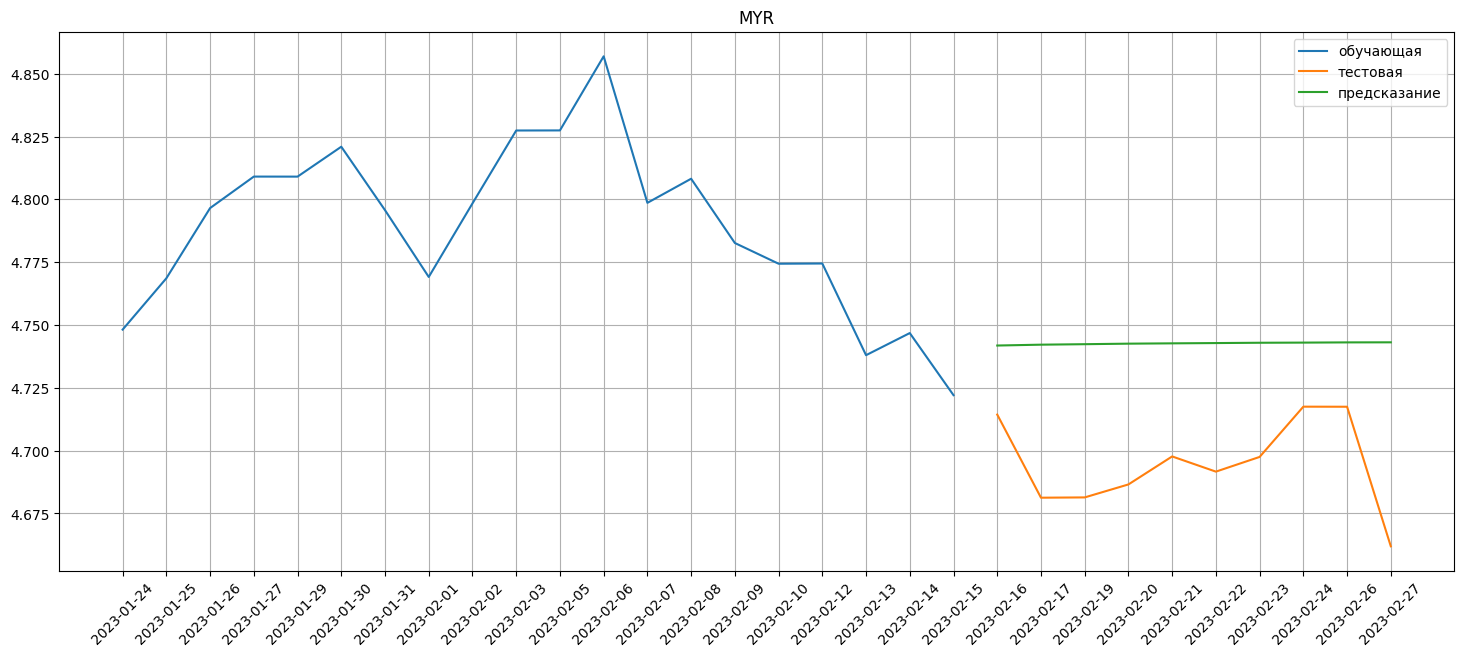


======================================== QAR ========================================
2023-11-05 18:19:57,580 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.4 MiB
2023-11-05 18:19:57,589 - ApiComposer - Initial pipeline was fitted in 11.9 sec.
2023-11-05 18:19:57,594 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-05 18:19:57,620 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 1 min. Set of candidate models: ['smoothing', 'diff_filter', 'gaussian_filter', 'glm', 'ts_naive_average', 'polyfit', 'cut', 'sparse_lagged', 'locf', 'lagged', 'ets', 'ar', 'sgdr', 'glm', 'ts_naive_average', 'cut', 'lasso', 'ransac_lin_reg', 'dtreg', 'rfr', 'ridge', 'normalization', 'ransac_non_lin_reg', 'smoothing', 'diff_filter', 'gaussian_filter', 'polyfit', 'linear', 'sparse_lagged', 'scaling', 'locf', 'adareg', 'lagged', 'pca', 'ets', 'ar'].
2023-11-05

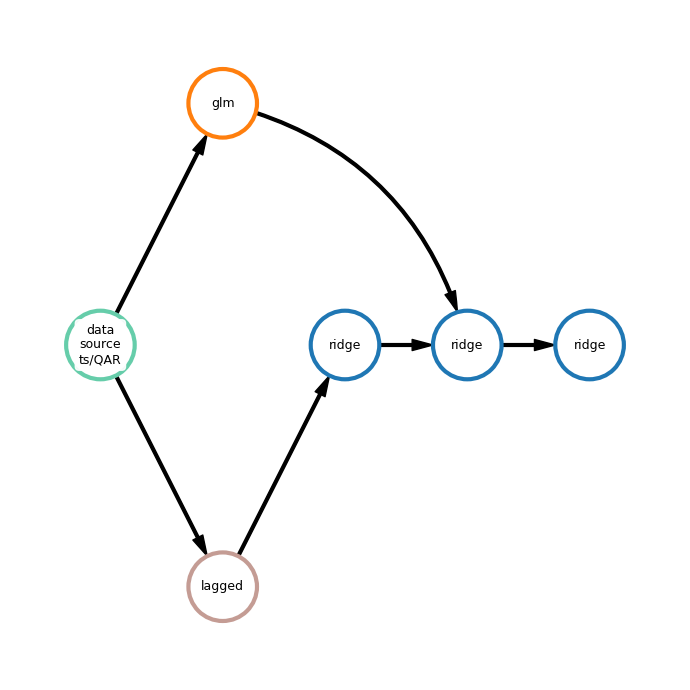

[5.83097907 5.8315917  5.83236329 5.83304756 5.83357375 5.83420503
 5.83491041 5.83563547 5.83641855 5.83713705]
{'mae': 0.064, 'mape': 0.011}


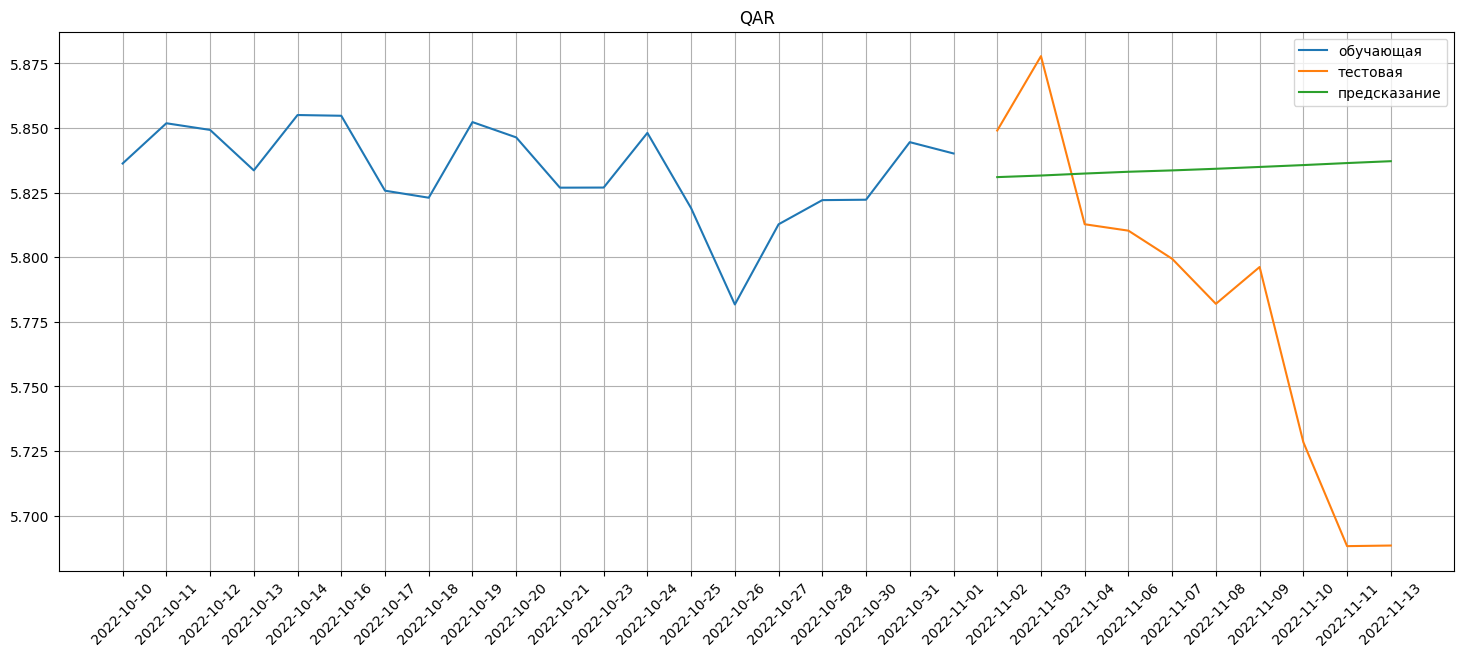


======================================== COP ========================================
2023-11-05 18:21:39,426 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 3.0 MiB
2023-11-05 18:21:39,432 - ApiComposer - Initial pipeline was fitted in 9.1 sec.
2023-11-05 18:21:39,437 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-05 18:21:39,463 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 1 min. Set of candidate models: ['smoothing', 'diff_filter', 'gaussian_filter', 'glm', 'ts_naive_average', 'polyfit', 'cut', 'sparse_lagged', 'locf', 'lagged', 'ets', 'ar', 'sgdr', 'glm', 'ts_naive_average', 'cut', 'lasso', 'ransac_lin_reg', 'dtreg', 'rfr', 'ridge', 'normalization', 'ransac_non_lin_reg', 'smoothing', 'diff_filter', 'gaussian_filter', 'polyfit', 'linear', 'sparse_lagged', 'scaling', 'locf', 'adareg', 'lagged', 'pca', 'ets', 'ar'].
2023-11-05 

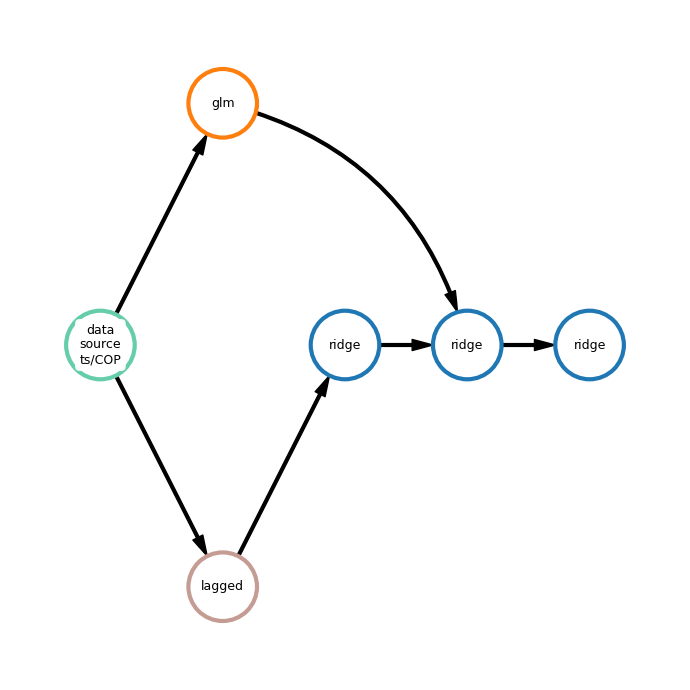

[0.005392   0.00539138 0.00539078 0.00539018 0.00538963 0.00538911
 0.00538862 0.0053881  0.00538758 0.00538704]
{'mae': 0.001, 'mape': 0.106}


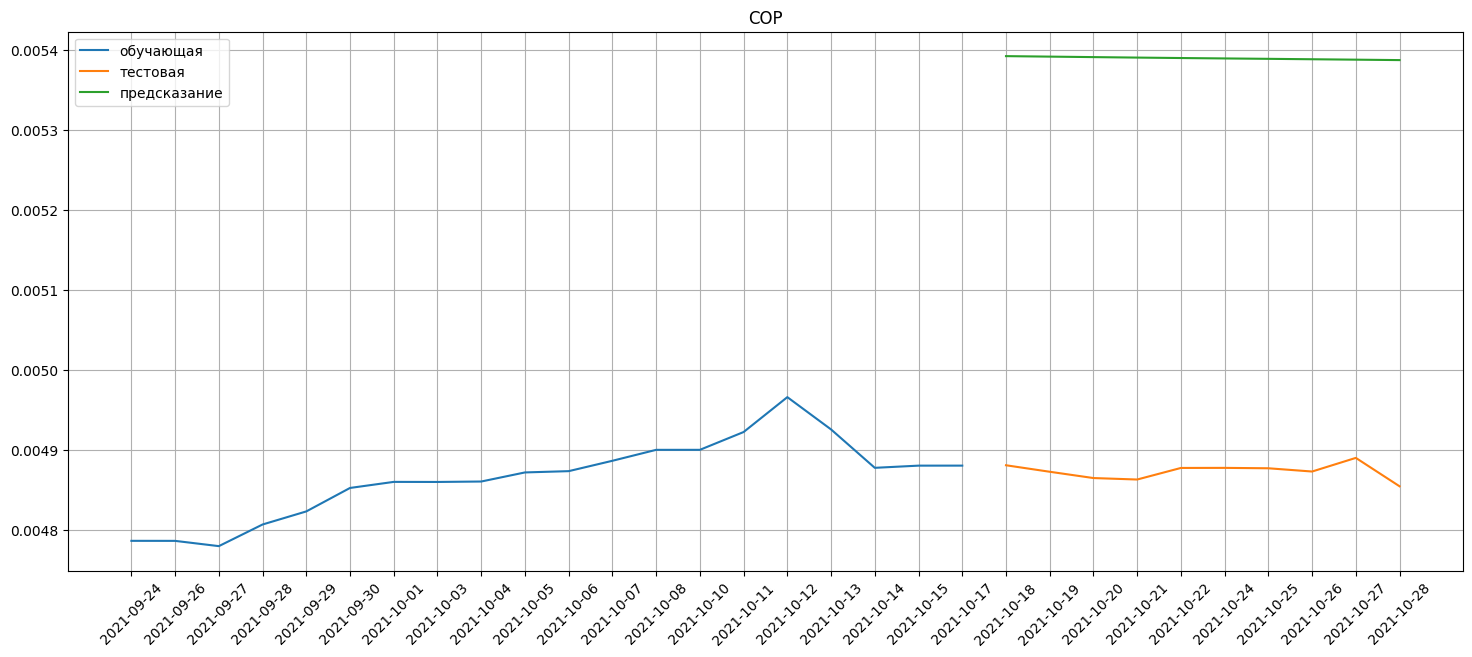

In [6]:
forecast_length = 10

start_time = time.time()

while True:
    
    item = {}
    item['time'] = time.localtime()
    
    print()
    
    elapsed_time = time.time() - start_time
    
    if elapsed_time > 10*60:
        break
    
    target_name = random.choice(abscur_data.columns)
    print('='*40, target_name, '='*40)
    
    item['target_name'] = target_name
    
    item['forecast_length'] = forecast_length
    
    # случайный сдвиг назад (случайная точка)
    
    delta = random.randint(0,1000-1)
    item['delta'] = delta
    
    
    # Сборка датасета
    
    target_train = np.ravel(abscur_data[target_name].values[:-forecast_length-delta])
    target_test = np.ravel(abscur_data[target_name].values[-forecast_length-delta:-delta])
    
    item['target_test'] = target_test

    idx_train = abscur_data.index[:-forecast_length-delta]
    idx_test = abscur_data.index[-forecast_length-delta:-delta]
    
    item['idx_test'] = list(idx_test)
    
    historical_data_inp = {}

    inp_name = target_name
    
    historical_data_inp[inp_name] = target_train
            
    # Сборка модели
    
    timeout = 1
    item['timeout'] = timeout
    
    fedot = Fedot(problem='ts_forecasting',
                  task_params=TsForecastingParams(forecast_length=forecast_length),
                  timeout=1)
    
    # Обучение модели
    
    fedot.fit(features=historical_data_inp,
              target=historical_data_inp[target_name])
    
    # Вид сети
    
    fedot.current_pipeline.show()
    model_struct_file = target_name + '_' + str(len(history)) + '_model.png'
    fedot.current_pipeline.show(save_path=model_struct_file)
    item['model_struct_file'] = model_struct_file
    
    model_struct = fedot.current_pipeline.structure
    item['model_struct'] = model_struct
    
    # Предсказание
    
    forecast = fedot.predict(historical_data_inp,in_sample=False)
    print(forecast)
    item['forecast'] = forecast
    
    # Расчет метрик
    
    metrics = fedot.get_metrics(target_test,metric_names=['mae','mape'])
    print(metrics)
    item['metrics'] = metrics
    
    # График
    
    plt.plot(idx_train[-20:],target_train[-20:],label='обучающая')
    plt.plot(idx_test,target_test,label='тестовая')
    plt.plot(idx_test,forecast,label='предсказание')
    plt.grid()
    plt.legend()
    plt.title(target_name)
    plt.xticks(rotation=45)
    
    plot_file = target_name + '_' + str(len(history)) + '_plot.png'
    plt.savefig(plot_file)
    item[plot_file] = plot_file
    
    plt.show()
    
    history.append(item)
    
#     break

with open("history.pickle", "wb") as file:
    pickle.dump(history, file)